In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import scorecardpy as sc
import pprint

C:\Users\chery\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\chery\anaconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\chery\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
data = pd.read_csv('Data.csv')

#use a copy of data for credit risk model
data_filter = data.copy()

data_filter

STATUS NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0            1         Cash loans           M            N               Y   
1            0         Cash loans           F            N               N   
2            0    Revolving loans           M            Y               Y   
3            0         Cash loans           F            N               Y   
4            0         Cash loans           M            N               Y   
...        ...                ...         ...          ...             ...   
307506       0         Cash loans           M            N               N   
307507       0         Cash loans           F            N               Y   
307508       0         Cash loans           F            N               Y   
307509       1         Cash loans           F            N               Y   
307510       0         Cash loans           F            N               N   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
1                  0          270000.0   1293502.5      35698.5   
2                  0           67500.0    135000.0       6750.0   
3                  0          135000.0    312682.5      29686.5   
4                  0          121500.0    513000.0      21865.5   
...              ...               ...         ...          ...   
307506             0          157500.0    254700.0      27558.0   
307507             0           72000.0    269550.0      12001.5   
307508             0          153000.0    677664.0      29979.0   
307509             0          171000.0    370107.0      20205.0   
307510             0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0              351000.0  ...                0                0   
1             1129500.0  ...                0                0   
2              135000.0  ...                0                0   
3              297000.0  ...                0                0   
4              513000.0  ...                0                0   
...                 ...  ...              ...              ...   
307506         225000.0  ...                0                0   
307507         225000.0  ...                0                0   
307508         585000.0  ...                0                0   
307509         319500.0  ...                0                0   
307510         675000.0  ...                0                0   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                     0                0                        0.0   
1                     0                0                        0.0   
2                     0                0                        0.0   
3                     0                0                        NaN   
4                     0                0                        0.0   
...                 ...              ...                        ...   
307506                0                0                        NaN   
307507                0                0                        NaN   
307508                0                0                        1.0   
307509                0                0                        0.0   
307510                0                0                        0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             NaN                         NaN   
4                             0.0                         0.0   
...                           ...                         ...   
307506                        NaN                         NaN   
307507                        NaN                         NaN   
307508                        0.0  

In [3]:
data.value_counts()

STATUS  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE      NAME_EDUCATION_TYPE            NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE       EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMEN

In [4]:
data_filter_self = data_filter.loc[data_filter['ORGANIZATION_TYPE'] =='Self-employed']
data_self =data_filter.loc[data_filter['ORGANIZATION_TYPE'] =='Self-employed']

In [5]:
data_filter_self.count()

STATUS                        38412
NAME_CONTRACT_TYPE            38412
CODE_GENDER                   38412
FLAG_OWN_CAR                  38412
FLAG_OWN_REALTY               38412
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     31921
AMT_REQ_CREDIT_BUREAU_WEEK    31921
AMT_REQ_CREDIT_BUREAU_MON     31921
AMT_REQ_CREDIT_BUREAU_QRT     31921
AMT_REQ_CREDIT_BUREAU_YEAR    31921
Length: 75, dtype: int64

In [6]:
data_filter_self.isnull().sum()

STATUS                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6491
AMT_REQ_CREDIT_BUREAU_WEEK    6491
AMT_REQ_CREDIT_BUREAU_MON     6491
AMT_REQ_CREDIT_BUREAU_QRT     6491
AMT_REQ_CREDIT_BUREAU_YEAR    6491
Length: 75, dtype: int64

In [7]:
data_filter_self.describe()

STATUS  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  38412.000000  38412.000000      3.841200e+04  3.841200e+04   
mean       0.101739      0.508851      1.674424e+05  5.890418e+05   
std        0.302309      0.763755      9.429796e+04  3.769039e+05   
min        0.000000      0.000000      2.700000e+04  4.500000e+04   
25%        0.000000      0.000000      1.125000e+05  2.710665e+05   
50%        0.000000      0.000000      1.485000e+05  5.123385e+05   
75%        0.000000      1.000000      2.025000e+05  8.086500e+05   
max        1.000000     14.000000      4.500000e+06  2.695500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   38409.000000     3.836000e+04                38412.000000   
mean    27807.587558     5.279449e+05                    0.018959   
std     14312.646602     3.444136e+05                    0.011526   
min      2317.500000     4.050000e+04                    0.000533   
25%     17167.500000     2.430000e+05                    0.009334   
50%     26086.500000     4.500000e+05                    0.018634   
75%     35617.500000     6.795000e+05                    0.026392   
max    225000.000000     2.475000e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  38412.000000   38412.000000       38412.000000  ...      38412.000000   
mean  -14547.136832   -1957.712199       -4500.203869  ...          0.001666   
std     3419.030343    1536.577092        3148.782216  ...          0.040785   
min   -25168.000000  -16360.000000      -20841.000000  ...          0.000000   
25%   -17115.000000   -2726.000000       -6715.000000  ...          0.000000   
50%   -14382.000000   -1575.000000       -4138.500000  ...          0.000000   
75%   -11770.750000    -823.000000       -1822.000000  ...          0.000000   
max    -7489.000000       0.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count      38412.000000      38412.000000      38412.000000   
mean           0.000937          0.000286          0.000260   
std            0.030600          0.016920          0.016133   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                31921.000000               31921.000000   
mean                     0.006046                   0.006453   
std                      0.079518                   0.098655   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   5.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                31921.000000               31921.000000   
mean                     0.034554                   0.218915   
std                      0.203270                   0.751027   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      6.000000                  19.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               31921.000000                31921.000000  
mean                    0.281539                    2.025375  
std                     0.626753                    1.894685  
min                     0.000000                    0.000000  
25%        

In [8]:
data_filter_self.drop(columns='CODE_GENDER',inplace=True)


In [9]:
data_filter_self.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38412 entries, 13 to 307504
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   STATUS                       38412 non-null  int64  
 1   NAME_CONTRACT_TYPE           38412 non-null  object 
 2   FLAG_OWN_CAR                 38412 non-null  object 
 3   FLAG_OWN_REALTY              38412 non-null  object 
 4   CNT_CHILDREN                 38412 non-null  int64  
 5   AMT_INCOME_TOTAL             38412 non-null  float64
 6   AMT_CREDIT                   38412 non-null  float64
 7   AMT_ANNUITY                  38409 non-null  float64
 8   AMT_GOODS_PRICE              38360 non-null  float64
 9   NAME_TYPE_SUITE              38259 non-null  object 
 10  NAME_INCOME_TYPE             38412 non-null  object 
 11  NAME_EDUCATION_TYPE          38412 non-null  object 
 12  NAME_FAMILY_STATUS           38412 non-null  object 
 13  NAME_HOUSING_T

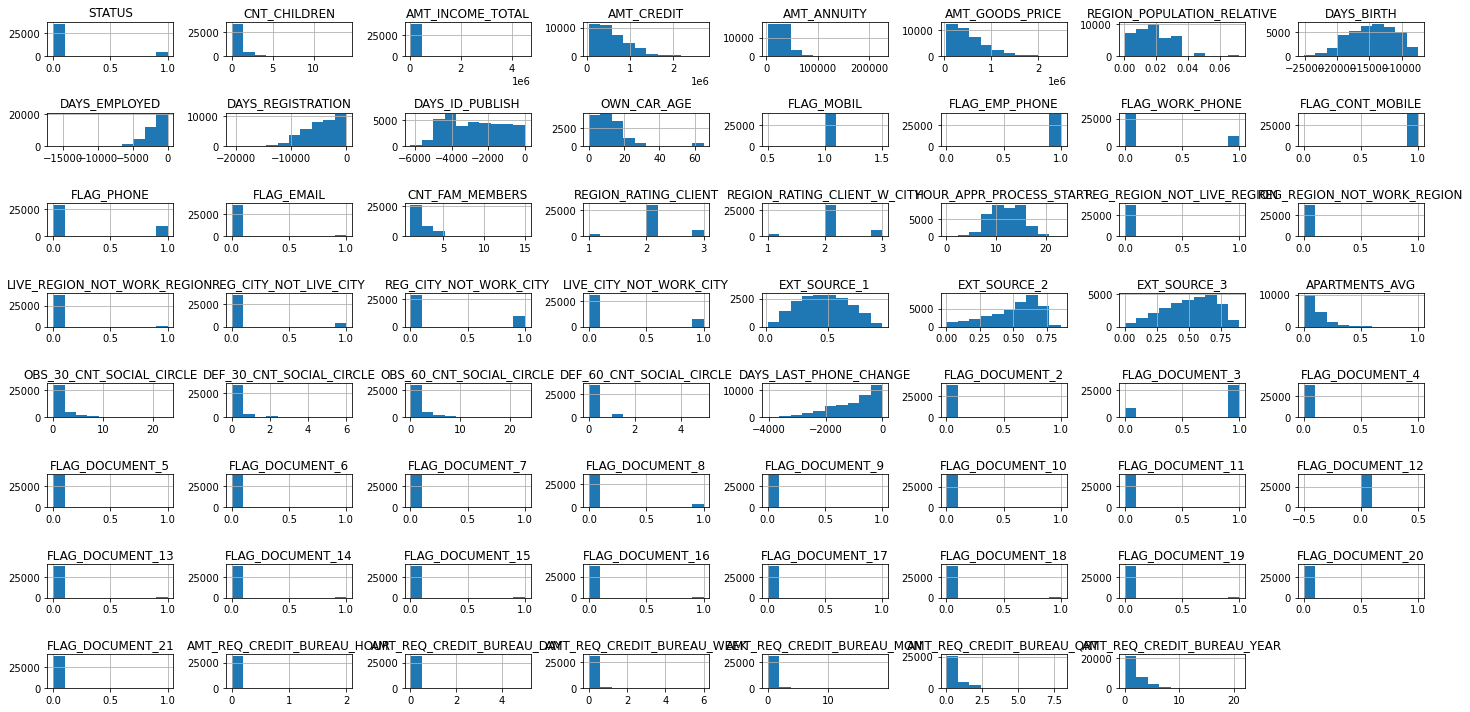

In [10]:
data_filter_self.describe(include = 'all')
data_filter_self.hist(figsize=(20,10))
plt.tight_layout()

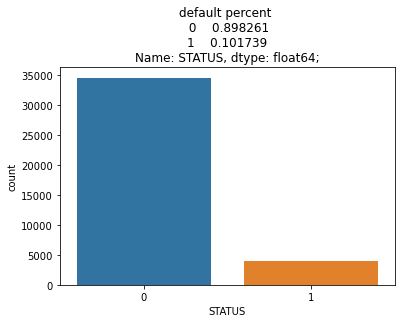

In [11]:
# percent of bads/default
sns.countplot(x = data_filter_self['STATUS'])
normalise_count = data_filter_self['STATUS'].value_counts(normalize = True)

# we are using the output of value_counts() normalised as the chart title
ax = plt.title('default percent \n {};'.format(normalise_count))

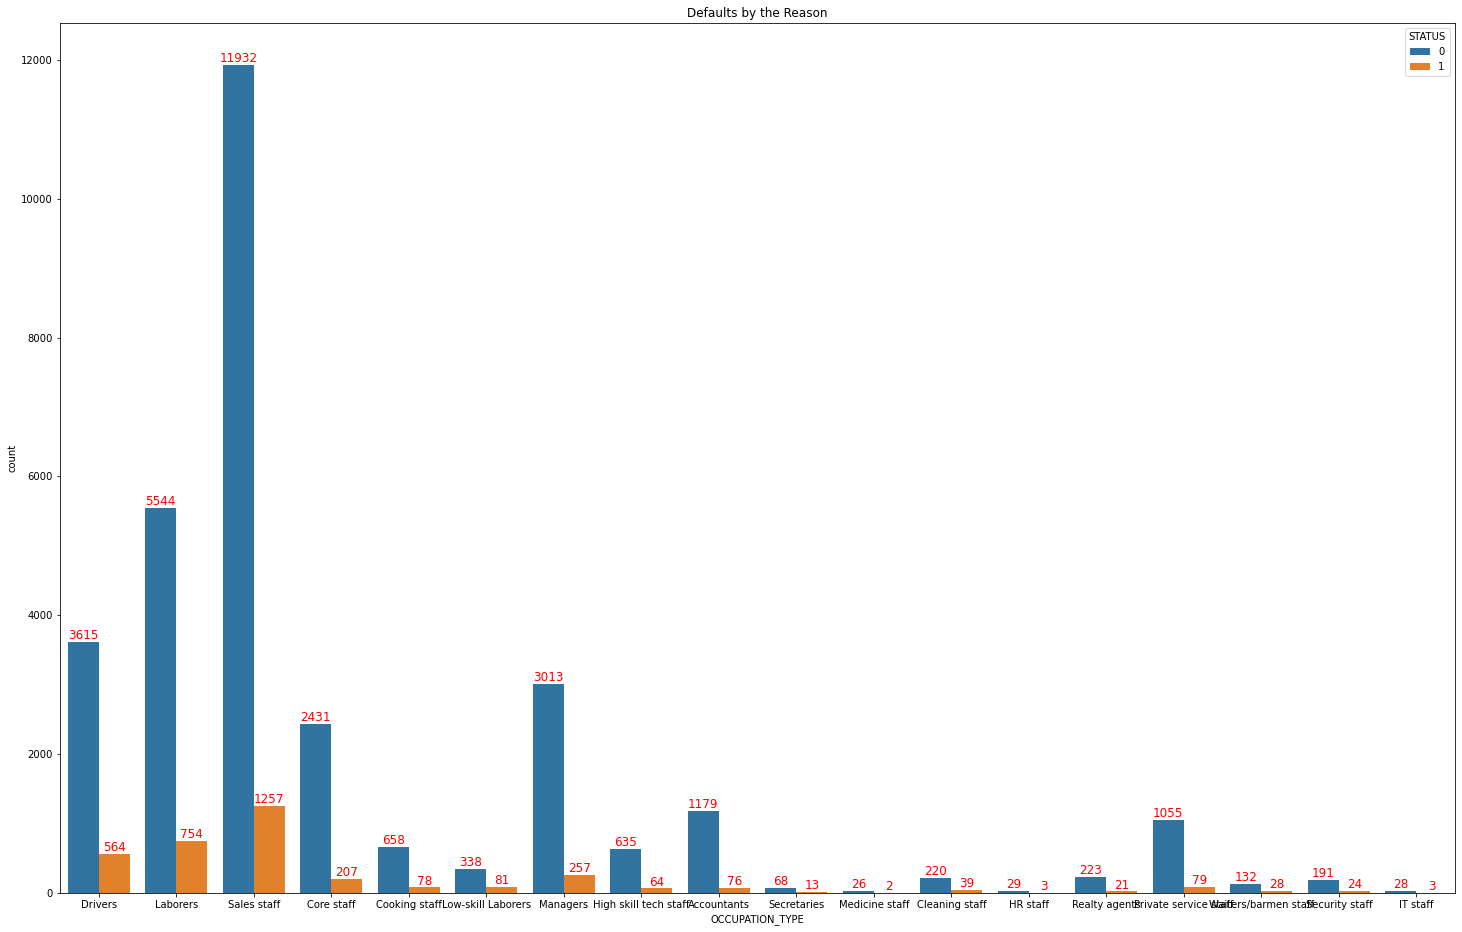

In [12]:
plt.figure(figsize=(25,16))
ax = sns.countplot(x= data_filter_self['OCCUPATION_TYPE'], hue=data_filter_self['STATUS'])
plt.title('Defaults by the Reason')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
            fontsize=12, color='red', ha='center', va='bottom')

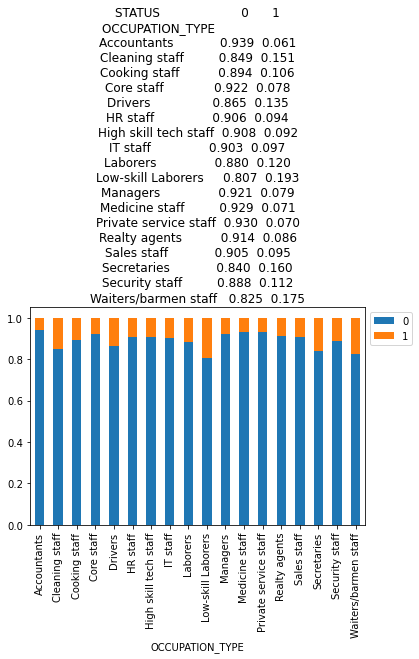

In [13]:
df_JobBivariate = data_filter_self.groupby('OCCUPATION_TYPE')['STATUS'].value_counts(normalize = True).unstack()

ax = df_JobBivariate.plot(kind='bar', stacked='True', title = str(df_JobBivariate.round(3)))
#place legend outside the chart
ax.legend(bbox_to_anchor=(1.0, 1.0))

<AxesSubplot:>

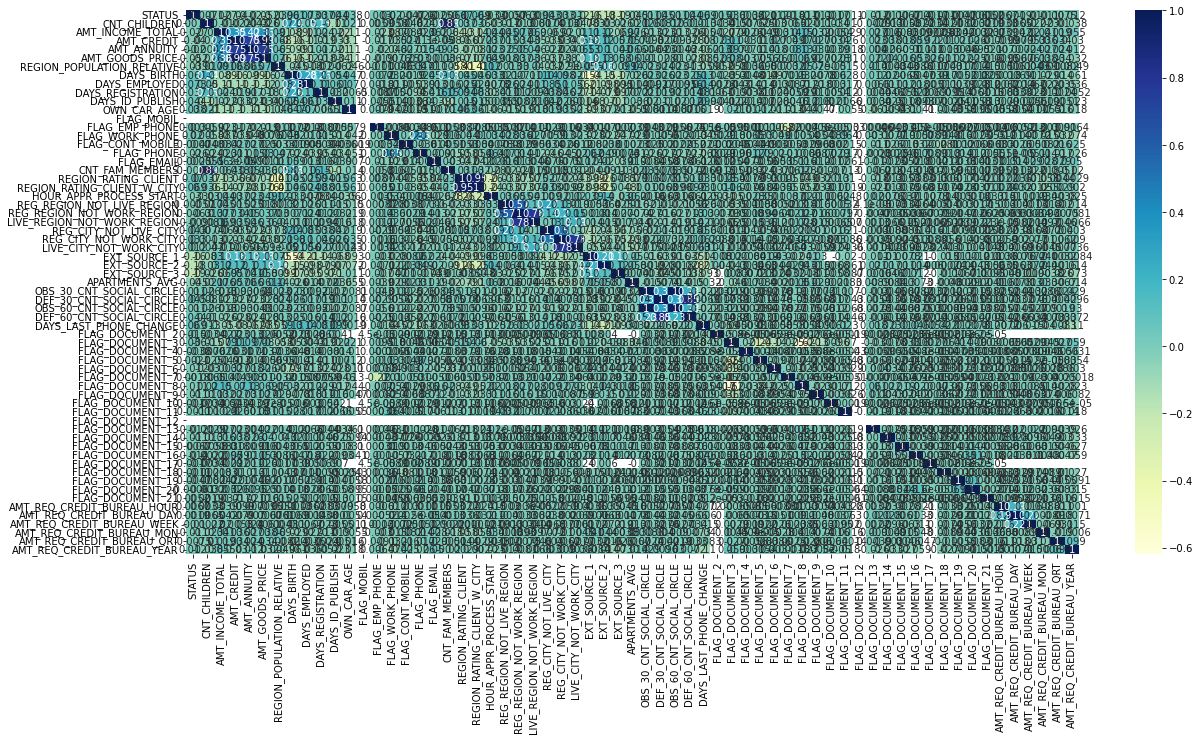

In [14]:
corr = data_filter_self.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap="YlGnBu", ax=ax)

In [15]:
missing= data_filter_self.isnull().sum()
top_4 = missing.sort_values(ascending=False).head(4)
top_4 = top_4.to_frame('count')
top_4['Percentage'] = (top_4['count']/len(data_filter_self))*100
top_4.round(2)

count  Percentage
OWN_CAR_AGE     23917       62.26
APARTMENTS_AVG  21807       56.77
EXT_SOURCE_1    19928       51.88
EXT_SOURCE_3     9623       25.05

In [16]:
rows_w_gt_3_na = data_filter_self[data_filter_self.isnull().sum(axis=1) > 3].shape[0]
print('Percent of total rows missing more than 3 values: ' + str("{:.1%}".format(rows_w_gt_3_na/data_filter_self.shape[0])))

Percent of total rows missing more than 3 values: 20.5%


In [17]:
data_filter_self.dropna(thresh=data_filter_self.shape[1]-3,inplace=True)
print("Starting row count: " + str(data_self.shape[0]))
print("Ending row count: " + str(data_filter_self.shape[0]))
print("Percent dropped: " + "{:.2%}".format(1-data_filter_self.shape[0]/data_self.shape[0]))

Starting row count: 38412
Ending row count: 30543
Percent dropped: 20.49%


In [18]:
col_w_na = pd.DataFrame((data_filter_self.isnull().sum().sort_values(ascending=False)/data_filter_self.shape[0])).applymap("{0:.0%}".format)

print(col_w_na[0])

OWN_CAR_AGE                    60%
APARTMENTS_AVG                 54%
EXT_SOURCE_1                   49%
EXT_SOURCE_3                    8%
OCCUPATION_TYPE                 7%
                              ... 
REG_REGION_NOT_WORK_REGION      0%
LIVE_REGION_NOT_WORK_REGION     0%
REG_CITY_NOT_LIVE_CITY          0%
REG_CITY_NOT_WORK_CITY          0%
AMT_REQ_CREDIT_BUREAU_YEAR      0%
Name: 0, Length: 74, dtype: object


In [19]:
data_filter_self.max()

STATUS                                      1
NAME_CONTRACT_TYPE            Revolving loans
FLAG_OWN_CAR                                Y
FLAG_OWN_REALTY                             Y
CNT_CHILDREN                               14
                                   ...       
AMT_REQ_CREDIT_BUREAU_DAY                 5.0
AMT_REQ_CREDIT_BUREAU_WEEK                6.0
AMT_REQ_CREDIT_BUREAU_MON                19.0
AMT_REQ_CREDIT_BUREAU_QRT                 8.0
AMT_REQ_CREDIT_BUREAU_YEAR               21.0
Length: 72, dtype: object

<AxesSubplot:>

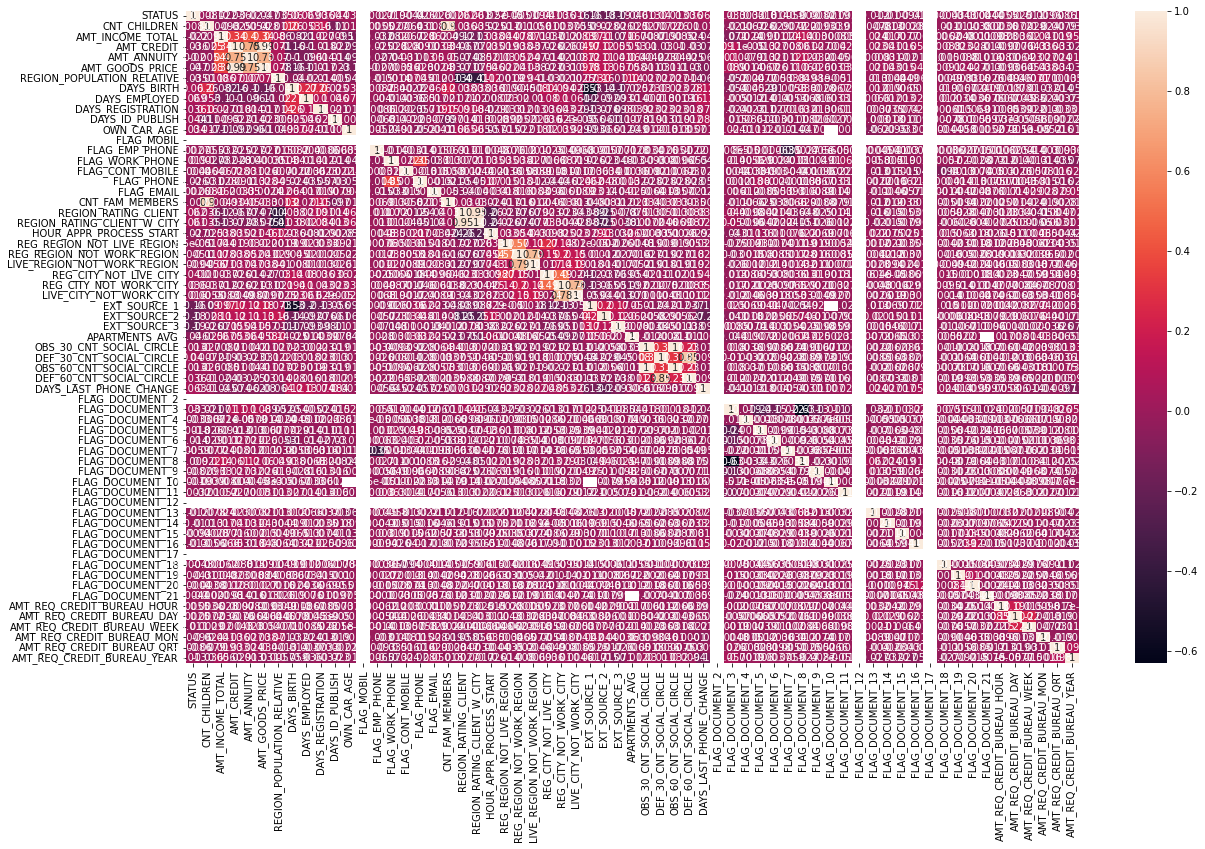

In [20]:
corre = data_filter_self.corr()
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corre,xticklabels=corre.columns,yticklabels=corre.columns,annot=True, ax=ax)

In [21]:
data_filter_self.drop(columns= 'AMT_GOODS_PRICE', inplace= True)

In [22]:
data_filter_self.dropna(inplace=True)
data_filter_self.isna().sum()

STATUS                        0
NAME_CONTRACT_TYPE            0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

In [23]:
data_filter_self.count()

STATUS                        2142
NAME_CONTRACT_TYPE            2142
FLAG_OWN_CAR                  2142
FLAG_OWN_REALTY               2142
CNT_CHILDREN                  2142
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     2142
AMT_REQ_CREDIT_BUREAU_WEEK    2142
AMT_REQ_CREDIT_BUREAU_MON     2142
AMT_REQ_CREDIT_BUREAU_QRT     2142
AMT_REQ_CREDIT_BUREAU_YEAR    2142
Length: 73, dtype: int64

In [24]:
data_filter_self.drop(columns= 'FLAG_OWN_CAR', inplace= True)
data_filter_self.drop(columns= 'ORGANIZATION_TYPE', inplace= True)

In [25]:
data_filter_self['NAME_CONTRACT_TYPE']

124            Cash loans
236            Cash loans
337            Cash loans
492       Revolving loans
701       Revolving loans
               ...       
306759         Cash loans
306819         Cash loans
306855         Cash loans
306967         Cash loans
307407         Cash loans
Name: NAME_CONTRACT_TYPE, Length: 2142, dtype: object

In [26]:
data_filter_self.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 124 to 307407
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   STATUS                       2142 non-null   int64  
 1   NAME_CONTRACT_TYPE           2142 non-null   object 
 2   FLAG_OWN_REALTY              2142 non-null   object 
 3   CNT_CHILDREN                 2142 non-null   int64  
 4   AMT_INCOME_TOTAL             2142 non-null   float64
 5   AMT_CREDIT                   2142 non-null   float64
 6   AMT_ANNUITY                  2142 non-null   float64
 7   NAME_TYPE_SUITE              2142 non-null   object 
 8   NAME_INCOME_TYPE             2142 non-null   object 
 9   NAME_EDUCATION_TYPE          2142 non-null   object 
 10  NAME_FAMILY_STATUS           2142 non-null   object 
 11  NAME_HOUSING_TYPE            2142 non-null   object 
 12  REGION_POPULATION_RELATIVE   2142 non-null   float64
 13  DAYS_BIRTH    

In [27]:
bins = sc.woebin(data_filter_self, y='STATUS')

# make it easy to read the bins
for variables , bindetails in bins.items():
    print(variables , " : ")
    display(bindetails)
    print("--"*50)

[INFO] creating woe binning ...
Binning on 2142 rows and 61 columns in 00:00:32
AMT_INCOME_TOTAL  : 


variable                  bin  count  count_distr  good  bad  \
0  AMT_INCOME_TOTAL      [-inf,110000.0)    192     0.089636   180   12   
1  AMT_INCOME_TOTAL  [110000.0,250000.0)   1490     0.695612  1383  107   
2  AMT_INCOME_TOTAL  [250000.0,280000.0)    128     0.059757   117   11   
3  AMT_INCOME_TOTAL       [280000.0,inf)    332     0.154995   317   15   

    badprob       woe    bin_iv  total_iv    breaks  is_special_values  
0  0.062500 -0.085383  0.000630  0.031649  110000.0              False  
1  0.071812  0.063486  0.002882  0.031649  250000.0              False  
2  0.085938  0.258389  0.004463  0.031649  280000.0              False  
3  0.045181 -0.428184  0.023674  0.031649       inf              False

----------------------------------------------------------------------------------------------------
DAYS_BIRTH  : 


variable                  bin  count  count_distr  good  bad   badprob  \
0  DAYS_BIRTH      [-inf,-19000.0)    151     0.070495   146    5  0.033113   
1  DAYS_BIRTH  [-19000.0,-17500.0)    167     0.077965   153   14  0.083832   
2  DAYS_BIRTH  [-17500.0,-10000.0)   1669     0.779178  1552  117  0.070102   
3  DAYS_BIRTH       [-10000.0,inf)    155     0.072362   146    9  0.058065   

        woe    bin_iv  total_iv    breaks  is_special_values  
0 -0.751501  0.029028  0.036563  -19000.0              False  
1  0.231287  0.004611  0.036563  -17500.0              False  
2  0.037542  0.001116  0.036563  -10000.0              False  
3 -0.163714  0.001808  0.036563       inf              False

----------------------------------------------------------------------------------------------------
DAYS_ID_PUBLISH  : 


variable                bin  count  count_distr  good  bad  \
0  DAYS_ID_PUBLISH     [-inf,-4400.0)    408     0.190476   381   27   
1  DAYS_ID_PUBLISH  [-4400.0,-4200.0)    147     0.068627   143    4   
2  DAYS_ID_PUBLISH  [-4200.0,-3400.0)    401     0.187208   380   21   
3  DAYS_ID_PUBLISH  [-3400.0,-2600.0)    336     0.156863   308   28   
4  DAYS_ID_PUBLISH  [-2600.0,-1300.0)    453     0.211485   425   28   
5  DAYS_ID_PUBLISH   [-1300.0,-600.0)    216     0.100840   191   25   
6  DAYS_ID_PUBLISH       [-600.0,inf)    181     0.084500   169   12   

    badprob       woe    bin_iv  total_iv   breaks  is_special_values  
0  0.066176 -0.024295  0.000111  0.110446  -4400.0              False  
1  0.027211 -0.953883  0.041991  0.110446  -4200.0              False  
2  0.052369 -0.272981  0.012409  0.110446  -3400.0              False  
3  0.083333  0.224772  0.008737  0.110446  -2600.0              False  
4  0.061810 -0.097217  0.001917  0.110446  -1300.0              False  
5  0.115741  0.589270  0.045238  0.110446   -600.0              False  
6  0.066298 -0.022324  0.000042  0.110446      inf              False

----------------------------------------------------------------------------------------------------
FLAG_PHONE  : 


variable         bin  count  count_distr  good  bad   badprob       woe  \
0  FLAG_PHONE  [-inf,1.0)   1551      0.72409  1442  109  0.070277  0.040229   
1  FLAG_PHONE   [1.0,inf)    591      0.27591   555   36  0.060914 -0.112782   

     bin_iv  total_iv breaks  is_special_values  
0  0.001192  0.004535    1.0              False  
1  0.003343  0.004535    inf              False

----------------------------------------------------------------------------------------------------
FLAG_CONT_MOBILE  : 


variable         bin  count  count_distr  good  bad   badprob  woe  \
0  FLAG_CONT_MOBILE  [-inf,inf)   2142          1.0  1997  145  0.067694  0.0   

   bin_iv  total_iv breaks  is_special_values  
0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
REG_CITY_NOT_LIVE_CITY  : 


variable         bin  count  count_distr  good  bad  \
0  REG_CITY_NOT_LIVE_CITY  [-inf,inf)   2142          1.0  1997  145   

    badprob  woe  bin_iv  total_iv breaks  is_special_values  
0  0.067694  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
EXT_SOURCE_2  : 


variable         bin  count  count_distr  good  bad   badprob  \
0  EXT_SOURCE_2  [-inf,0.2)    109     0.050887    84   25  0.229358   
1  EXT_SOURCE_2   [0.2,0.4)    269     0.125584   244   25  0.092937   
2  EXT_SOURCE_2   [0.4,0.5)    272     0.126984   253   19  0.069853   
3  EXT_SOURCE_2   [0.5,inf)   1492     0.696545  1416   76  0.050938   

        woe    bin_iv  total_iv breaks  is_special_values  
0  1.410727  0.183889  0.257217    0.2              False  
1  0.344375  0.017298  0.257217    0.4              False  
2  0.033717  0.000146  0.257217    0.5              False  
3 -0.302190  0.055883  0.257217    inf              False

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_WEEK  : 


variable         bin  count  count_distr  good  bad  \
0  AMT_REQ_CREDIT_BUREAU_WEEK  [-inf,inf)   2142          1.0  1997  145   

    badprob  woe  bin_iv  total_iv breaks  is_special_values  
0  0.067694  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE  : 


variable              bin  count  count_distr  good  bad  \
0  NAME_CONTRACT_TYPE  Revolving loans    225     0.105042   218    7   
1  NAME_CONTRACT_TYPE       Cash loans   1917     0.894958  1779  138   

    badprob       woe    bin_iv  total_iv           breaks  is_special_values  
0  0.031111 -0.815917  0.049679  0.053705  Revolving loans              False  
1  0.071987  0.066115  0.004026  0.053705       Cash loans              False

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_HOUR  : 


variable         bin  count  count_distr  good  bad  \
0  AMT_REQ_CREDIT_BUREAU_HOUR  [-inf,inf)   2142          1.0  1997  145   

    badprob  woe  bin_iv  total_iv breaks  is_special_values  
0  0.067694  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
REG_REGION_NOT_LIVE_REGION  : 


variable         bin  count  count_distr  good  bad  \
0  REG_REGION_NOT_LIVE_REGION  [-inf,inf)   2142          1.0  1997  145   

    badprob  woe  bin_iv  total_iv breaks  is_special_values  
0  0.067694  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
FLAG_WORK_PHONE  : 


variable         bin  count  count_distr  good  bad   badprob  \
0  FLAG_WORK_PHONE  [-inf,1.0)   1666     0.777778  1554  112  0.067227   
1  FLAG_WORK_PHONE   [1.0,inf)    476     0.222222   443   33  0.069328   

        woe    bin_iv  total_iv breaks  is_special_values  
0 -0.007421  0.000043   0.00019    1.0              False  
1  0.025605  0.000147   0.00019    inf              False

----------------------------------------------------------------------------------------------------
DAYS_REGISTRATION  : 


variable                bin  count  count_distr  good  bad  \
0  DAYS_REGISTRATION     [-inf,-9500.0)    115     0.053688   107    8   
1  DAYS_REGISTRATION  [-9500.0,-7500.0)    262     0.122316   253    9   
2  DAYS_REGISTRATION  [-7500.0,-5500.0)    316     0.147526   300   16   
3  DAYS_REGISTRATION  [-5500.0,-1500.0)    942     0.439776   883   59   
4  DAYS_REGISTRATION      [-1500.0,inf)    507     0.236695   454   53   

    badprob       woe    bin_iv  total_iv   breaks  is_special_values  
0  0.069565  0.029280  0.000047  0.127004  -9500.0              False  
1  0.034351 -0.713497  0.046107  0.127004  -7500.0              False  
2  0.050633 -0.308526  0.012304  0.127004  -5500.0              False  
3  0.062633 -0.083120  0.002931  0.127004  -1500.0              False  
4  0.104536  0.474862  0.065615  0.127004      inf              False

----------------------------------------------------------------------------------------------------
LIVE_REGION_NOT_WORK_REGION  : 


variable         bin  count  count_distr  good  bad  \
0  LIVE_REGION_NOT_WORK_REGION  [-inf,inf)   2142          1.0  1997  145   

    badprob  woe  bin_iv  total_iv breaks  is_special_values  
0  0.067694  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
APARTMENTS_AVG  : 


variable          bin  count  count_distr  good  bad   badprob  \
0  APARTMENTS_AVG  [-inf,0.11)   1331     0.621382  1226  105  0.078888   
1  APARTMENTS_AVG   [0.11,0.2)    508     0.237162   475   33  0.064961   
2  APARTMENTS_AVG    [0.2,inf)    303     0.141457   296    7  0.023102   

        woe    bin_iv  total_iv breaks  is_special_values  
0  0.165116  0.018199   0.13077   0.11              False  
1 -0.044140  0.000453   0.13077    0.2              False  
2 -1.121782  0.112118   0.13077    inf              False

----------------------------------------------------------------------------------------------------
DEF_60_CNT_SOCIAL_CIRCLE  : 


variable         bin  count  count_distr  good  bad  \
0  DEF_60_CNT_SOCIAL_CIRCLE  [-inf,1.0)   1964       0.9169  1843  121   
1  DEF_60_CNT_SOCIAL_CIRCLE   [1.0,inf)    178       0.0831   154   24   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.061609 -0.100692  0.008901   0.07642    1.0              False  
1  0.134831  0.763769  0.067518   0.07642    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_6  : 


variable         bin  count  count_distr  good  bad   badprob  woe  \
0  FLAG_DOCUMENT_6  [-inf,inf)   2142          1.0  1997  145  0.067694  0.0   

   bin_iv  total_iv breaks  is_special_values  
0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_20  : 


variable         bin  count  count_distr  good  bad   badprob  woe  \
0  FLAG_DOCUMENT_20  [-inf,inf)   2142          1.0  1997  145  0.067694  0.0   

   bin_iv  total_iv breaks  is_special_values  
0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
NAME_HOUSING_TYPE  : 


variable                                                bin  \
0  NAME_HOUSING_TYPE  Office apartment%,%Rented apartment%,%House / ...   
1  NAME_HOUSING_TYPE  Co-op apartment%,%Municipal apartment%,%With p...   

   count  count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
0   1950     0.910364  1823  127  0.065128 -0.041384  0.001532  0.014631   
1    192     0.089636   174   18  0.093750  0.353984  0.013100  0.014631   

                                              breaks  is_special_values  
0  Office apartment%,%Rented apartment%,%House / ...              False  
1  Co-op apartment%,%Municipal apartment%,%With p...              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_3  : 


variable         bin  count  count_distr  good  bad   badprob  \
0  FLAG_DOCUMENT_3  [-inf,1.0)    636     0.296919   610   26  0.040881   
1  FLAG_DOCUMENT_3   [1.0,inf)   1506     0.703081  1387  119  0.079017   

        woe    bin_iv  total_iv breaks  is_special_values  
0 -0.532695  0.067198  0.088251    1.0              False  
1  0.166893  0.021053  0.088251    inf              False

----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


variable                                  bin  count  \
0  NAME_EDUCATION_TYPE                     Higher education    644   
1  NAME_EDUCATION_TYPE  Incomplete higher%,%Lower secondary    119   
2  NAME_EDUCATION_TYPE        Secondary / secondary special   1379   

   count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
0     0.300654   618   26  0.040373 -0.545724  0.071028  0.095447   
1     0.055556   111    8  0.067227 -0.007421  0.000003  0.095447   
2     0.643791  1268  111  0.080493  0.187002  0.024416  0.095447   

                                breaks  is_special_values  
0                     Higher education              False  
1  Incomplete higher%,%Lower secondary              False  
2        Secondary / secondary special              False

----------------------------------------------------------------------------------------------------
EXT_SOURCE_3  : 


variable                         bin  count  count_distr  good  bad  \
0  EXT_SOURCE_3  [-inf,0.30000000000000004)    373     0.174136   312   61   
1  EXT_SOURCE_3   [0.30000000000000004,0.4)    290     0.135387   263   27   
2  EXT_SOURCE_3                   [0.4,0.5)    360     0.168067   351    9   
3  EXT_SOURCE_3                   [0.5,inf)   1119     0.522409  1071   48   

    badprob       woe    bin_iv  total_iv               breaks  \
0  0.163539  0.990538  0.261953  0.498215  0.30000000000000004   
1  0.093103  0.346350  0.018879  0.498215                  0.4   
2  0.025000 -1.040894  0.118344  0.498215                  0.5   
3  0.042895 -0.482479  0.099039  0.498215                  inf   

   is_special_values  
0              False  
1              False  
2              False  
3              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_5  : 


variable         bin  count  count_distr  good  bad   badprob  woe  \
0  FLAG_DOCUMENT_5  [-inf,inf)   2142          1.0  1997  145  0.067694  0.0   

   bin_iv  total_iv breaks  is_special_values  
0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
REG_CITY_NOT_WORK_CITY  : 


variable         bin  count  count_distr  good  bad  \
0  REG_CITY_NOT_WORK_CITY  [-inf,1.0)   1883     0.879085  1750  133   
1  REG_CITY_NOT_WORK_CITY   [1.0,inf)    259     0.120915   247   12   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.070632  0.045646  0.001868  0.018313    1.0              False  
1  0.046332 -0.401814  0.016445  0.018313    inf              False

----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


variable                                                bin  count  \
0  NAME_INCOME_TYPE  Businessman%,%State servant%,%Commercial assoc...    762   
1  NAME_INCOME_TYPE                                            Working   1380   

   count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
0     0.355742   720   42  0.055118 -0.218914  0.015518   0.02297   
1     0.644258  1277  103  0.074638  0.105128  0.007452   0.02297   

                                              breaks  is_special_values  
0  Businessman%,%State servant%,%Commercial assoc...              False  
1                                            Working              False

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_YEAR  : 


variable         bin  count  count_distr  good  bad  \
0  AMT_REQ_CREDIT_BUREAU_YEAR  [-inf,1.0)    542     0.253035   511   31   
1  AMT_REQ_CREDIT_BUREAU_YEAR   [1.0,2.0)    527     0.246032   495   32   
2  AMT_REQ_CREDIT_BUREAU_YEAR   [2.0,5.0)    876     0.408964   811   65   
3  AMT_REQ_CREDIT_BUREAU_YEAR   [5.0,inf)    197     0.091970   180   17   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.057196 -0.179715  0.007564  0.022014    1.0              False  
1  0.060721 -0.116154  0.003157  0.022014    2.0              False  
2  0.074201  0.098787  0.004166  0.022014    5.0              False  
3  0.086294  0.262924  0.007127  0.022014    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_9  : 


variable         bin  count  count_distr  good  bad   badprob  woe  \
0  FLAG_DOCUMENT_9  [-inf,inf)   2142          1.0  1997  145  0.067694  0.0   

   bin_iv  total_iv breaks  is_special_values  
0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT  : 


variable         bin  count  count_distr  good  bad   badprob  \
0  REGION_RATING_CLIENT  [-inf,2.0)    173     0.080766   163   10  0.057803   
1  REGION_RATING_CLIENT   [2.0,3.0)   1653     0.771709  1548  105  0.063521   
2  REGION_RATING_CLIENT   [3.0,inf)    316     0.147526   286   30  0.094937   

        woe    bin_iv  total_iv breaks  is_special_values  
0 -0.168498  0.002133  0.029034    2.0              False  
1 -0.068091  0.003474  0.029034    3.0              False  
2  0.367873  0.023427  0.029034    inf              False

----------------------------------------------------------------------------------------------------
OWN_CAR_AGE  : 


variable          bin  count  count_distr  good  bad   badprob  \
0  OWN_CAR_AGE   [-inf,6.0)    658     0.307190   625   33  0.050152   
1  OWN_CAR_AGE    [6.0,8.0)    282     0.131653   260   22  0.078014   
2  OWN_CAR_AGE    [8.0,9.0)    108     0.050420   103    5  0.046296   
3  OWN_CAR_AGE   [9.0,10.0)    124     0.057890   120    4  0.032258   
4  OWN_CAR_AGE  [10.0,24.0)    821     0.383287   756   65  0.079172   
5  OWN_CAR_AGE   [24.0,inf)    149     0.069561   133   16  0.107383   

        woe    bin_iv  total_iv breaks  is_special_values  
0 -0.318576  0.027201  0.096552    6.0              False  
1  0.153028  0.003295  0.096552    8.0              False  
2 -0.402623  0.006883  0.096552    9.0              False  
3 -0.778530  0.025305  0.096552   10.0              False  
4  0.169013  0.011782  0.096552   24.0              False  
5  0.504907  0.022087  0.096552    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_11  : 


variable         bin  count  count_distr  good  bad   badprob  woe  \
0  FLAG_DOCUMENT_11  [-inf,inf)   2142          1.0  1997  145  0.067694  0.0   

   bin_iv  total_iv breaks  is_special_values  
0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
REG_REGION_NOT_WORK_REGION  : 


variable         bin  count  count_distr  good  bad  \
0  REG_REGION_NOT_WORK_REGION  [-inf,inf)   2142          1.0  1997  145   

    badprob  woe  bin_iv  total_iv breaks  is_special_values  
0  0.067694  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
CNT_CHILDREN  : 


variable         bin  count  count_distr  good  bad   badprob  \
0  CNT_CHILDREN  [-inf,1.0)   1233     0.575630  1151   82  0.066504   
1  CNT_CHILDREN   [1.0,2.0)    618     0.288515   576   42  0.067961   
2  CNT_CHILDREN   [2.0,inf)    291     0.135854   270   21  0.072165   

        woe    bin_iv  total_iv breaks  is_special_values  
0 -0.019000  0.000206  0.000873    1.0              False  
1  0.004230  0.000005  0.000873    2.0              False  
2  0.068768  0.000662  0.000873    inf              False

----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT_W_CITY  : 


variable         bin  count  count_distr  good  bad  \
0  REGION_RATING_CLIENT_W_CITY  [-inf,2.0)    185     0.086368   174   11   
1  REGION_RATING_CLIENT_W_CITY   [2.0,3.0)   1693     0.790383  1584  109   
2  REGION_RATING_CLIENT_W_CITY   [3.0,inf)    264     0.123249   239   25   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.059459 -0.138492  0.001561  0.023039    2.0              False  
1  0.064383 -0.053693  0.002226  0.023039    3.0              False  
2  0.094697  0.365080  0.019252  0.023039    inf              False

----------------------------------------------------------------------------------------------------
NAME_FAMILY_STATUS  : 


variable                          bin  count  count_distr  good  \
0  NAME_FAMILY_STATUS         Single / not married    270     0.126050   255   
1  NAME_FAMILY_STATUS               Civil marriage    242     0.112979   227   
2  NAME_FAMILY_STATUS  Separated%,%Married%,%Widow   1630     0.760971  1515   

   bad   badprob       woe    bin_iv  total_iv                       breaks  \
0   15  0.055556 -0.210546  0.005104  0.007599         Single / not married   
1   15  0.061983 -0.094232  0.000963  0.007599               Civil marriage   
2  115  0.070552  0.044429  0.001531  0.007599  Separated%,%Married%,%Widow   

   is_special_values  
0              False  
1              False  
2              False

----------------------------------------------------------------------------------------------------
HOUR_APPR_PROCESS_START  : 


variable          bin  count  count_distr  good  bad  \
0  HOUR_APPR_PROCESS_START   [-inf,8.0)    149     0.069561   141    8   
1  HOUR_APPR_PROCESS_START   [8.0,10.0)    279     0.130252   254   25   
2  HOUR_APPR_PROCESS_START  [10.0,13.0)    738     0.344538   690   48   
3  HOUR_APPR_PROCESS_START  [13.0,15.0)    444     0.207283   410   34   
4  HOUR_APPR_PROCESS_START  [15.0,16.0)    159     0.074230   150    9   
5  HOUR_APPR_PROCESS_START  [16.0,17.0)    150     0.070028   144    6   
6  HOUR_APPR_PROCESS_START  [17.0,18.0)    108     0.050420   100    8   
7  HOUR_APPR_PROCESS_START   [18.0,inf)    115     0.053688   108    7   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.053691 -0.246651  0.003807  0.042768    8.0              False  
1  0.089606  0.304209  0.013757  0.042768   10.0              False  
2  0.065041 -0.042823  0.000620  0.042768   13.0              False  
3  0.076577  0.132871  0.003876  0.042768   15.0              False  
4  0.056604 -0.190743  0.002488  0.042768   16.0              False  
5  0.040000 -0.555386  0.017066  0.042768   17.0              False  
6  0.074074  0.096939  0.000494  0.042768   18.0              False  
7  0.060870 -0.113553  0.000659  0.042768    inf              False

----------------------------------------------------------------------------------------------------
DAYS_EMPLOYED  : 


variable                bin  count  count_distr  good  bad   badprob  \
0  DAYS_EMPLOYED     [-inf,-5000.0)    112     0.052288   107    5  0.044643   
1  DAYS_EMPLOYED  [-5000.0,-3800.0)    148     0.069094   145    3  0.020270   
2  DAYS_EMPLOYED  [-3800.0,-3000.0)    224     0.104575   202   22  0.098214   
3  DAYS_EMPLOYED  [-3000.0,-1400.0)    725     0.338469   684   41  0.056552   
4  DAYS_EMPLOYED  [-1400.0,-1200.0)    131     0.061158   116   15  0.114504   
5  DAYS_EMPLOYED   [-1200.0,-600.0)    451     0.210551   423   28  0.062084   
6  DAYS_EMPLOYED    [-600.0,-400.0)    136     0.063492   121   15  0.110294   
7  DAYS_EMPLOYED       [-400.0,inf)    215     0.100373   199   16  0.074419   

        woe    bin_iv  total_iv   breaks  is_special_values  
0 -0.440723  0.008417  0.157486  -5000.0              False  
1 -1.255454  0.065182  0.157486  -3800.0              False  
2  0.405442  0.020504  0.157486  -3000.0              False  
3 -0.191718  0.011456  0.157486  -1400.0              False  
4  0.577128  0.026179  0.157486  -1200.0              False  
5 -0.092500  0.001731  0.157486   -600.0              False  
6  0.534927  0.022926  0.157486   -400.0              False  
7  0.101951  0.001090  0.157486      inf              False

----------------------------------------------------------------------------------------------------
EXT_SOURCE_1  : 


variable                                       bin  count  count_distr  \
0  EXT_SOURCE_1                [-inf,0.30000000000000004)    432     0.201681   
1  EXT_SOURCE_1  [0.30000000000000004,0.7000000000000001)   1377     0.642857   
2  EXT_SOURCE_1                  [0.7000000000000001,inf)    333     0.155462   

   good  bad   badprob       woe    bin_iv  total_iv               breaks  \
0   373   59  0.136574  0.778627  0.171388   0.25808  0.30000000000000004   
1  1303   74  0.053740 -0.245692  0.034921   0.25808   0.7000000000000001   
2   321   12  0.036036 -0.663867  0.051770   0.25808                  inf   

   is_special_values  
0              False  
1              False  
2              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_15  : 


variable         bin  count  count_distr  good  bad   badprob  woe  \
0  FLAG_DOCUMENT_15  [-inf,inf)   2142          1.0  1997  145  0.067694  0.0   

   bin_iv  total_iv breaks  is_special_values  
0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_QRT  : 


variable         bin  count  count_distr  good  bad  \
0  AMT_REQ_CREDIT_BUREAU_QRT  [-inf,1.0)   1703     0.795051  1588  115   
1  AMT_REQ_CREDIT_BUREAU_QRT   [1.0,2.0)    305     0.142390   287   18   
2  AMT_REQ_CREDIT_BUREAU_QRT   [2.0,inf)    134     0.062558   122   12   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.067528 -0.002631  0.000005   0.00945    1.0              False  
1  0.059016 -0.146443  0.002867   0.00945    2.0              False  
2  0.089552  0.303553  0.006577   0.00945    inf              False

----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE  : 


variable                                                bin  count  \
0  NAME_TYPE_SUITE                 Children%,%Other_A%,%Unaccompanied   1755   
1  NAME_TYPE_SUITE  Family%,%Spouse, partner%,%Other_B%,%Group of ...    387   

   count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
0     0.819328  1647  108  0.061538 -0.101912  0.008144  0.038162   
1     0.180672   350   37  0.095607  0.375652  0.030018  0.038162   

                                              breaks  is_special_values  
0                 Children%,%Other_A%,%Unaccompanied              False  
1  Family%,%Spouse, partner%,%Other_B%,%Group of ...              False

----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


variable                  bin  count  count_distr  good  bad   badprob  \
0  AMT_CREDIT      [-inf,200000.0)    179     0.083567   171    8  0.044693   
1  AMT_CREDIT  [200000.0,400000.0)    518     0.241830   485   33  0.063707   
2  AMT_CREDIT  [400000.0,850000.0)    858     0.400560   782   76  0.088578   
3  AMT_CREDIT       [850000.0,inf)    587     0.274043   559   28  0.047700   

        woe    bin_iv  total_iv    breaks  is_special_values  
0 -0.439554  0.013387  0.085257  200000.0              False  
1 -0.064974  0.000993  0.085257  400000.0              False  
2  0.291546  0.038645  0.085257  850000.0              False  
3 -0.371277  0.032233  0.085257       inf              False

----------------------------------------------------------------------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE  : 


variable         bin  count  count_distr  good  bad  \
0  DEF_30_CNT_SOCIAL_CIRCLE  [-inf,1.0)   1897     0.885621  1782  115   
1  DEF_30_CNT_SOCIAL_CIRCLE   [1.0,inf)    245     0.114379   215   30   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.060622 -0.117892  0.011699  0.076522    1.0              False  
1  0.122449  0.653227  0.064823  0.076522    inf              False

----------------------------------------------------------------------------------------------------
WEEKDAY_APPR_PROCESS_START  : 


variable                 bin  count  count_distr  good  \
0  WEEKDAY_APPR_PROCESS_START  TUESDAY%,%SATURDAY    584     0.272642   550   
1  WEEKDAY_APPR_PROCESS_START   THURSDAY%,%FRIDAY    704     0.328665   657   
2  WEEKDAY_APPR_PROCESS_START              MONDAY    381     0.177871   354   
3  WEEKDAY_APPR_PROCESS_START  WEDNESDAY%,%SUNDAY    473     0.220822   436   

   bad   badprob       woe    bin_iv  total_iv              breaks  \
0   34  0.058219 -0.160890  0.006585  0.012843  TUESDAY%,%SATURDAY   
1   47  0.066761 -0.014869  0.000072  0.012843   THURSDAY%,%FRIDAY   
2   27  0.070866  0.049208  0.000440  0.012843              MONDAY   
3   37  0.078224  0.155943  0.005746  0.012843  WEDNESDAY%,%SUNDAY   

   is_special_values  
0              False  
1              False  
2              False  
3              False

----------------------------------------------------------------------------------------------------
OBS_30_CNT_SOCIAL_CIRCLE  : 


variable         bin  count  count_distr  good  bad  \
0  OBS_30_CNT_SOCIAL_CIRCLE  [-inf,1.0)   1109     0.517740  1043   66   
1  OBS_30_CNT_SOCIAL_CIRCLE   [1.0,3.0)    543     0.253501   507   36   
2  OBS_30_CNT_SOCIAL_CIRCLE   [3.0,4.0)    152     0.070962   137   15   
3  OBS_30_CNT_SOCIAL_CIRCLE   [4.0,6.0)    171     0.079832   160   11   
4  OBS_30_CNT_SOCIAL_CIRCLE   [6.0,inf)    167     0.077965   150   17   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.059513 -0.137534  0.009230  0.042658    1.0              False  
1  0.066298 -0.022324  0.000125  0.042658    3.0              False  
2  0.098684  0.410737  0.014312  0.042658    4.0              False  
3  0.064327 -0.054611  0.000233  0.042658    6.0              False  
4  0.101796  0.445246  0.018758  0.042658    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_16  : 


variable         bin  count  count_distr  good  bad   badprob  woe  \
0  FLAG_DOCUMENT_16  [-inf,inf)   2142          1.0  1997  145  0.067694  0.0   

   bin_iv  total_iv breaks  is_special_values  
0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE  : 


variable          bin  count  count_distr  good  bad  \
0  REGION_POPULATION_RELATIVE  [-inf,0.01)    532     0.248366   500   32   
1  REGION_POPULATION_RELATIVE  [0.01,0.02)    715     0.333800   675   40   
2  REGION_POPULATION_RELATIVE  [0.02,0.04)    777     0.362745   711   66   
3  REGION_POPULATION_RELATIVE   [0.04,inf)    118     0.055089   111    7   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.060150 -0.126205  0.003746  0.041756   0.01              False  
1  0.055944 -0.203166  0.012626  0.041756   0.02              False  
2  0.084942  0.245650  0.024353  0.041756   0.04              False  
3  0.059322 -0.140952  0.001030  0.041756    inf              False

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_DAY  : 


variable         bin  count  count_distr  good  bad  \
0  AMT_REQ_CREDIT_BUREAU_DAY  [-inf,inf)   2142          1.0  1997  145   

    badprob  woe  bin_iv  total_iv breaks  is_special_values  
0  0.067694  0.0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
FLAG_EMAIL  : 


variable         bin  count  count_distr  good  bad   badprob       woe  \
0  FLAG_EMAIL  [-inf,1.0)   1893     0.883754  1770  123  0.064976 -0.043883   
1  FLAG_EMAIL   [1.0,inf)    249     0.116246   227   22  0.088353  0.288760   

     bin_iv  total_iv breaks  is_special_values  
0  0.001670  0.012658    1.0              False  
1  0.010988  0.012658    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_18  : 


variable         bin  count  count_distr  good  bad   badprob  woe  \
0  FLAG_DOCUMENT_18  [-inf,inf)   2142          1.0  1997  145  0.067694  0.0   

   bin_iv  total_iv breaks  is_special_values  
0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
OBS_60_CNT_SOCIAL_CIRCLE  : 


variable         bin  count  count_distr  good  bad  \
0  OBS_60_CNT_SOCIAL_CIRCLE  [-inf,3.0)   1656     0.773109  1554  102   
1  OBS_60_CNT_SOCIAL_CIRCLE   [3.0,4.0)    150     0.070028   135   15   
2  OBS_60_CNT_SOCIAL_CIRCLE   [4.0,inf)    336     0.156863   308   28   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.061594 -0.100947  0.007543  0.031531    3.0              False  
1  0.100000  0.425443  0.015251  0.031531    4.0              False  
2  0.083333  0.224772  0.008737  0.031531    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_14  : 


variable         bin  count  count_distr  good  bad   badprob  woe  \
0  FLAG_DOCUMENT_14  [-inf,inf)   2142          1.0  1997  145  0.067694  0.0   

   bin_iv  total_iv breaks  is_special_values  
0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
OCCUPATION_TYPE  : 


variable                                                bin  count  \
0  OCCUPATION_TYPE  Realty agents%,%HR staff%,%Medicine staff%,%IT...    141   
1  OCCUPATION_TYPE                Private service staff%,%Sales staff    675   
2  OCCUPATION_TYPE                              Managers%,%Core staff    611   
3  OCCUPATION_TYPE  Laborers%,%Drivers%,%High skill tech staff%,%C...    715   

   count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
0     0.065826   138    3  0.021277 -1.205974  0.058386  0.156133   
1     0.315126   642   33  0.048889 -0.345413  0.032433  0.156133   
2     0.285247   572   39  0.063830 -0.062910  0.001099  0.156133   
3     0.333800   645   70  0.097902  0.401913  0.064215  0.156133   

                                              breaks  is_special_values  
0  Realty agents%,%HR staff%,%Medicine staff%,%IT...              False  
1                Private service staff%,%Sales staff              False  
2                              Managers%,%Core staff              False  
3  Laborers%,%Drivers%,%High skill tech staff%,%C...              False

----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY  : 


variable bin  count  count_distr  good  bad   badprob       woe  \
0  FLAG_OWN_REALTY   N    653     0.304855   609   44  0.067381 -0.004961   
1  FLAG_OWN_REALTY   Y   1489     0.695145  1388  101  0.067831  0.002169   

     bin_iv  total_iv breaks  is_special_values  
0  0.000007  0.000011      N              False  
1  0.000003  0.000011      Y              False

----------------------------------------------------------------------------------------------------
AMT_ANNUITY  : 


variable                bin  count  count_distr  good  bad   badprob  \
0  AMT_ANNUITY     [-inf,16000.0)    352     0.164332   336   16  0.045455   
1  AMT_ANNUITY  [16000.0,22000.0)    290     0.135387   273   17  0.058621   
2  AMT_ANNUITY  [22000.0,28000.0)    379     0.176937   350   29  0.076517   
3  AMT_ANNUITY  [28000.0,30000.0)    135     0.063025   130    5  0.037037   
4  AMT_ANNUITY  [30000.0,38000.0)    391     0.182540   346   45  0.115090   
5  AMT_ANNUITY      [38000.0,inf)    595     0.277778   562   33  0.055462   

        woe    bin_iv  total_iv   breaks  is_special_values  
0 -0.421855  0.024429  0.141474  16000.0              False  
1 -0.153591  0.002989  0.141474  22000.0              False  
2  0.132030  0.003266  0.141474  28000.0              False  
3 -0.635429  0.019454  0.141474  30000.0              False  
4  0.582891  0.079906  0.141474  38000.0              False  
5 -0.212327  0.011431  0.141474      inf              False

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_MON  : 


variable         bin  count  count_distr  good  bad  \
0  AMT_REQ_CREDIT_BUREAU_MON  [-inf,1.0)   1750     0.816993  1635  115   
1  AMT_REQ_CREDIT_BUREAU_MON   [1.0,inf)    392     0.183007   362   30   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.065714 -0.031798  0.000815  0.004203    1.0              False  
1  0.076531  0.132221  0.003388  0.004203    inf              False

----------------------------------------------------------------------------------------------------
LIVE_CITY_NOT_WORK_CITY  : 


variable         bin  count  count_distr  good  bad  \
0  LIVE_CITY_NOT_WORK_CITY  [-inf,1.0)   1930     0.901027  1797  133   
1  LIVE_CITY_NOT_WORK_CITY   [1.0,inf)    212     0.098973   200   12   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.068912  0.019143  0.000333   0.00365    1.0              False  
1  0.056604 -0.190743  0.003317   0.00365    inf              False

----------------------------------------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE  : 


variable                bin  count  count_distr  good  bad  \
0  DAYS_LAST_PHONE_CHANGE     [-inf,-2600.0)    110     0.051354   102    8   
1  DAYS_LAST_PHONE_CHANGE  [-2600.0,-1900.0)    268     0.125117   259    9   
2  DAYS_LAST_PHONE_CHANGE  [-1900.0,-1700.0)    165     0.077031   155   10   
3  DAYS_LAST_PHONE_CHANGE      [-1700.0,inf)   1599     0.746499  1481  118   

    badprob       woe    bin_iv  total_iv   breaks  is_special_values  
0  0.072727  0.077136  0.000316  0.057878  -2600.0              False  
1  0.033582 -0.736936  0.049836  0.057878  -1900.0              False  
2  0.060606 -0.118172  0.001022  0.057878  -1700.0              False  
3  0.073796  0.092879  0.006704  0.057878      inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_8  : 


variable         bin  count  count_distr  good  bad   badprob  \
0  FLAG_DOCUMENT_8  [-inf,1.0)   1776     0.829132  1651  125  0.070383   
1  FLAG_DOCUMENT_8   [1.0,inf)    366     0.170868   346   20  0.054645   

        woe    bin_iv  total_iv breaks  is_special_values  
0  0.041845  0.001478  0.009535    1.0              False  
1 -0.228039  0.008056  0.009535    inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_13  : 


variable         bin  count  count_distr  good  bad   badprob  woe  \
0  FLAG_DOCUMENT_13  [-inf,inf)   2142          1.0  1997  145  0.067694  0.0   

   bin_iv  total_iv breaks  is_special_values  
0     0.0       0.0    inf              False

----------------------------------------------------------------------------------------------------
CNT_FAM_MEMBERS  : 


variable         bin  count  count_distr  good  bad   badprob  \
0  CNT_FAM_MEMBERS  [-inf,2.0)    297     0.138655   277   20  0.067340   
1  CNT_FAM_MEMBERS   [2.0,4.0)   1573     0.734360  1469  104  0.066116   
2  CNT_FAM_MEMBERS   [4.0,inf)    272     0.126984   251   21  0.077206   

        woe    bin_iv  total_iv breaks  is_special_values  
0 -0.005618  0.000004  0.003181    2.0              False  
1 -0.025279  0.000464  0.003181    4.0              False  
2  0.141737  0.002713  0.003181    inf              False

----------------------------------------------------------------------------------------------------


{'AMT_INCOME_TOTAL': <Figure size 432x288 with 2 Axes>,
 'DAYS_BIRTH': <Figure size 432x288 with 2 Axes>,
 'DAYS_ID_PUBLISH': <Figure size 432x288 with 2 Axes>,
 'FLAG_PHONE': <Figure size 432x288 with 2 Axes>,
 'FLAG_CONT_MOBILE': <Figure size 432x288 with 2 Axes>,
 'REG_CITY_NOT_LIVE_CITY': <Figure size 432x288 with 2 Axes>,
 'EXT_SOURCE_2': <Figure size 432x288 with 2 Axes>,
 'AMT_REQ_CREDIT_BUREAU_WEEK': <Figure size 432x288 with 2 Axes>,
 'NAME_CONTRACT_TYPE': <Figure size 432x288 with 2 Axes>,
 'AMT_REQ_CREDIT_BUREAU_HOUR': <Figure size 432x288 with 2 Axes>,
 'REG_REGION_NOT_LIVE_REGION': <Figure size 432x288 with 2 Axes>,
 'FLAG_WORK_PHONE': <Figure size 432x288 with 2 Axes>,
 'DAYS_REGISTRATION': <Figure size 432x288 with 2 Axes>,
 'LIVE_REGION_NOT_WORK_REGION': <Figure size 432x288 with 2 Axes>,
 'APARTMENTS_AVG': <Figure size 432x288 with 2 Axes>,
 'DEF_60_CNT_SOCIAL_CIRCLE': <Figure size 432x288 with 2 Axes>,
 'FLAG_DOCUMENT_6': <Figure size 432x288 with 2 Axes>,
 'FLAG_DOCU

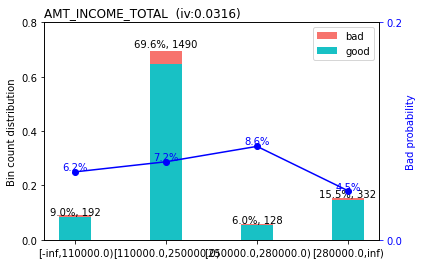

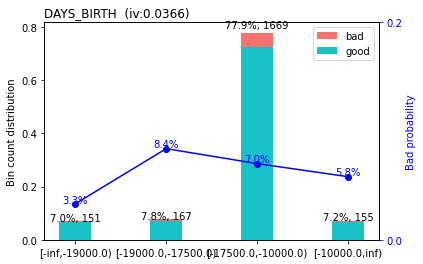

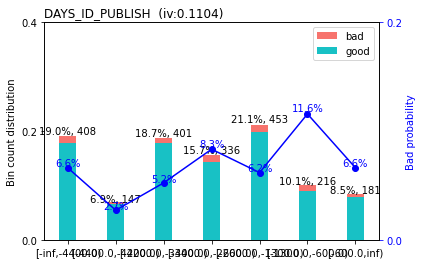

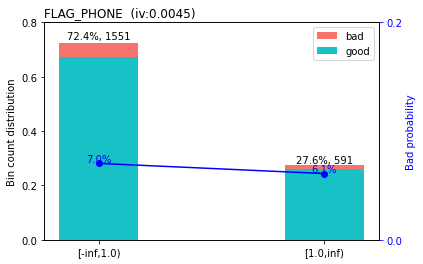

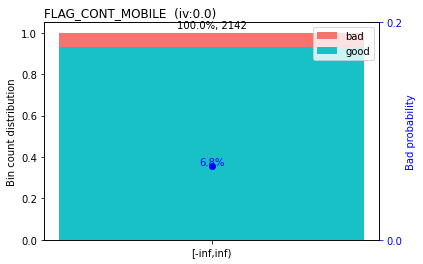

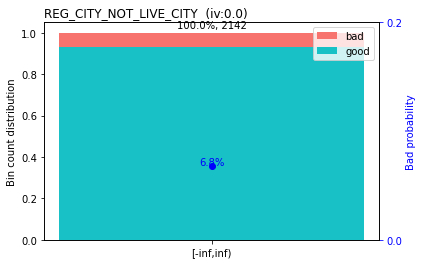

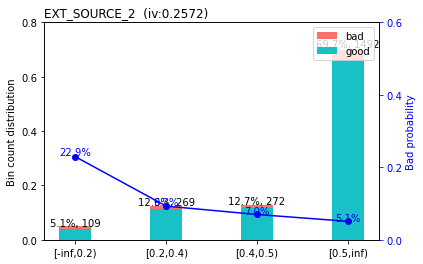

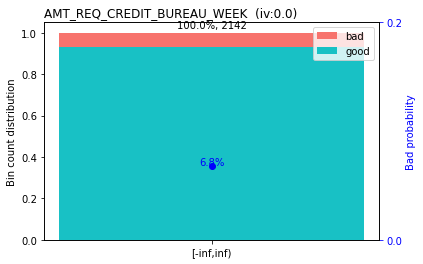

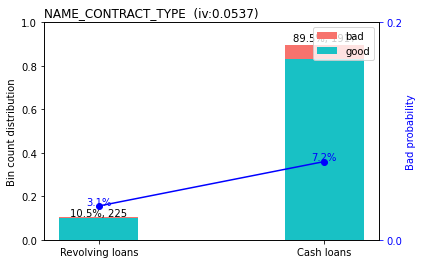

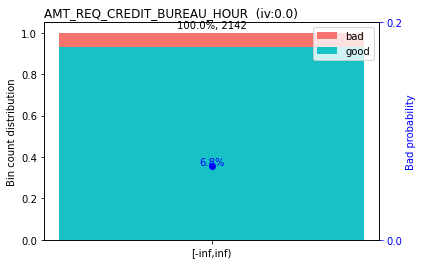

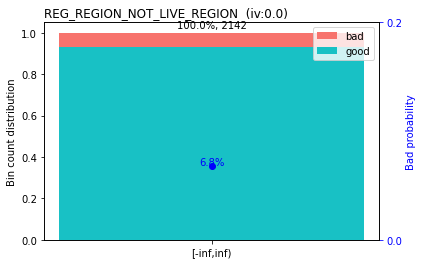

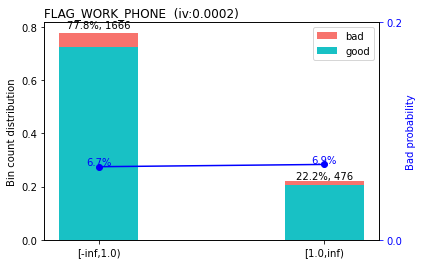

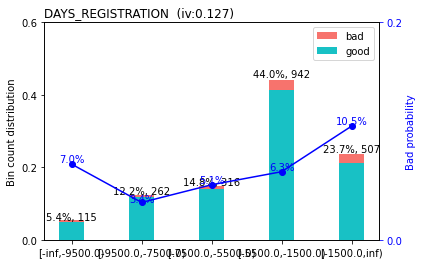

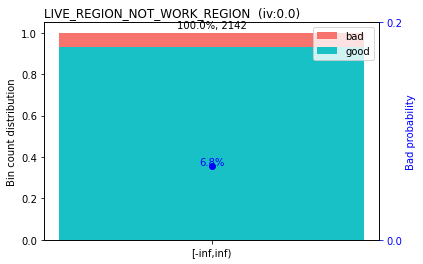

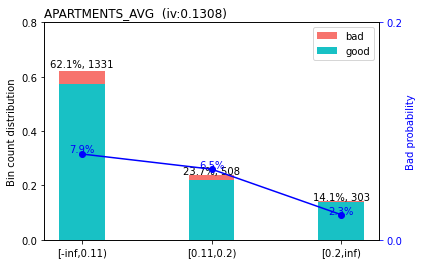

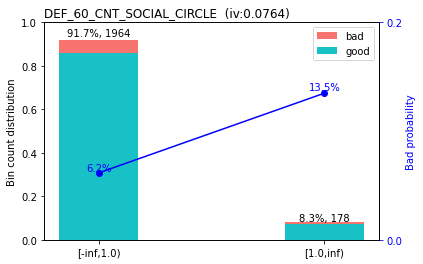

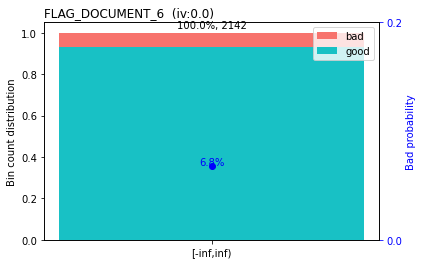

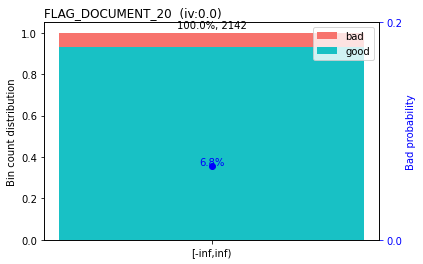

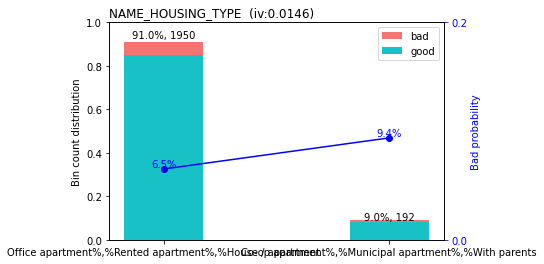

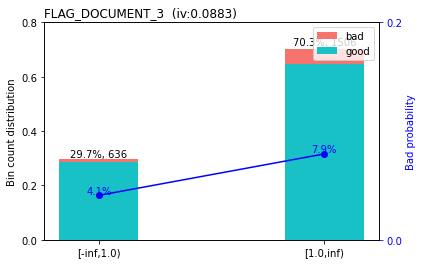

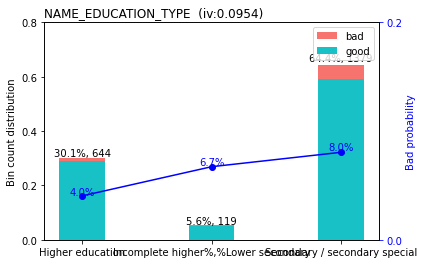

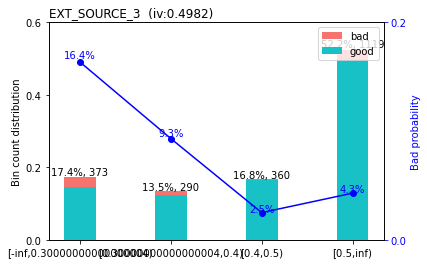

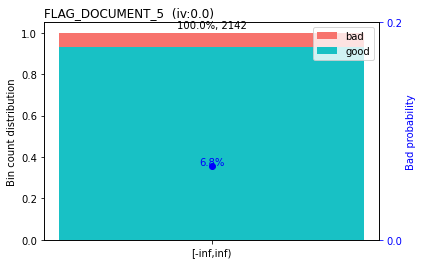

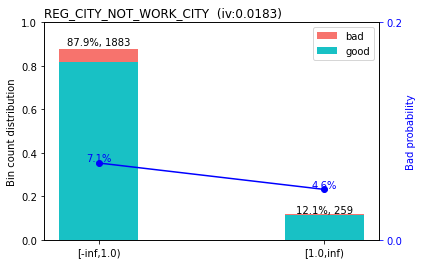

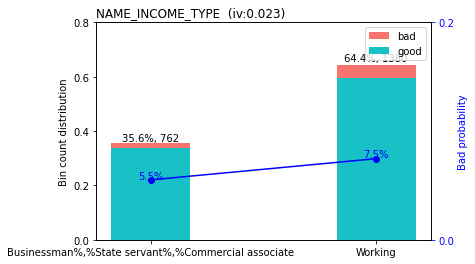

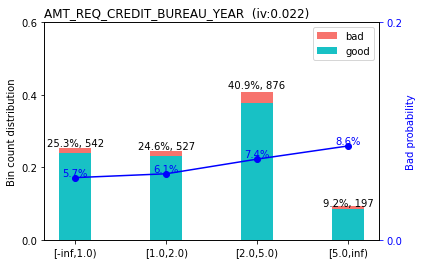

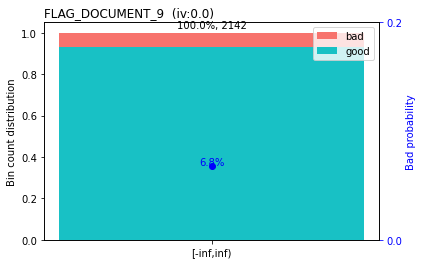

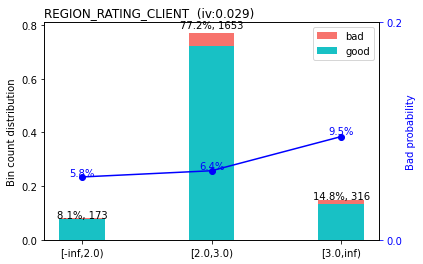

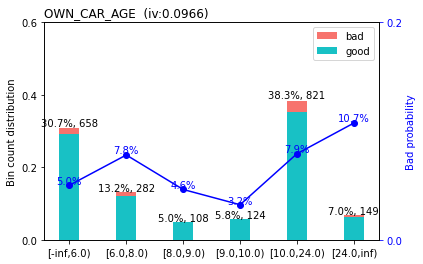

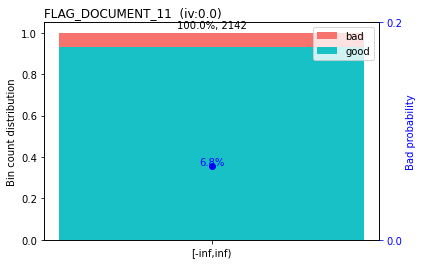

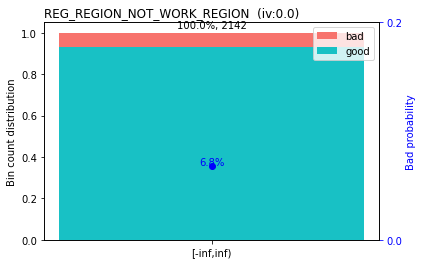

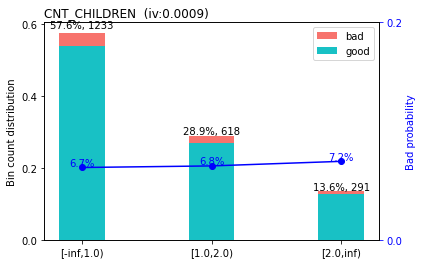

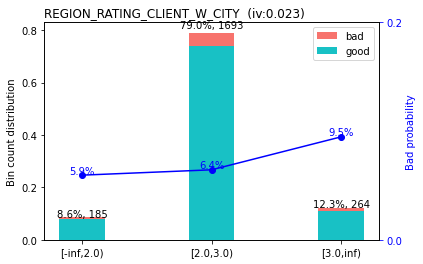

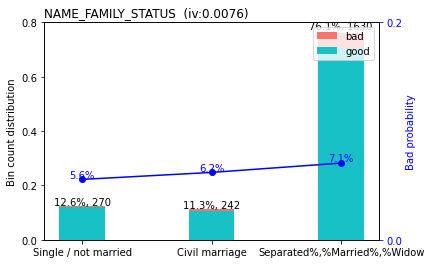

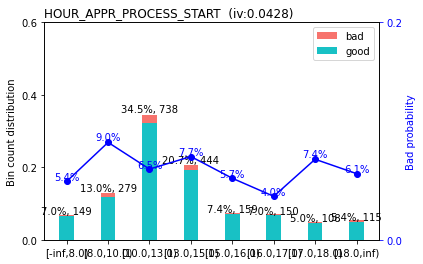

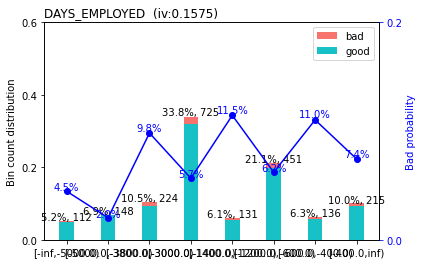

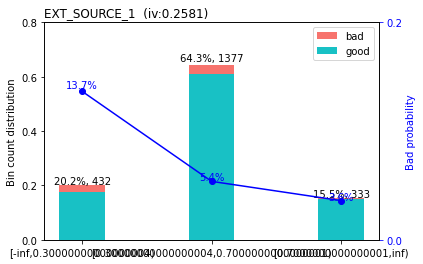

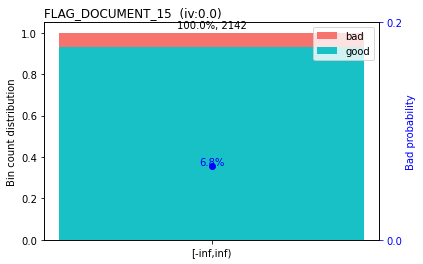

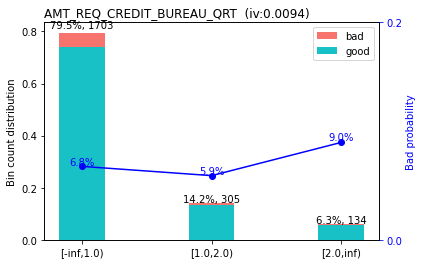

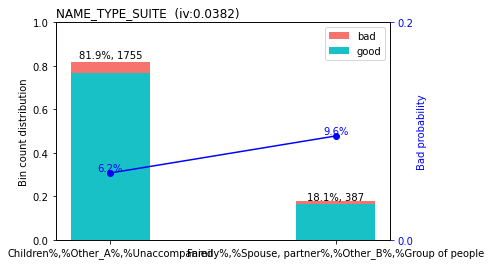

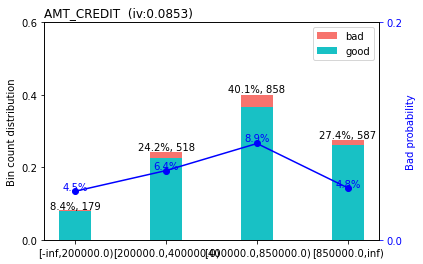

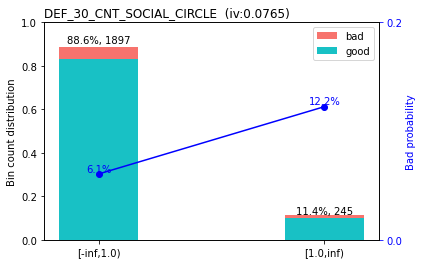

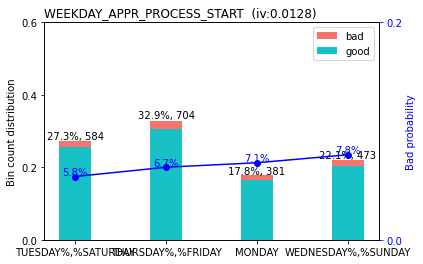

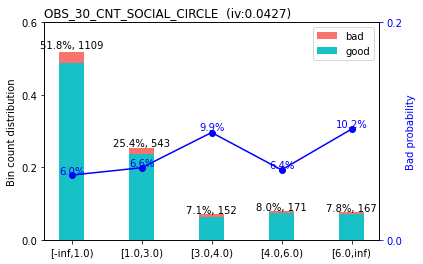

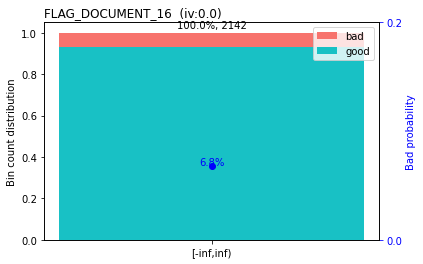

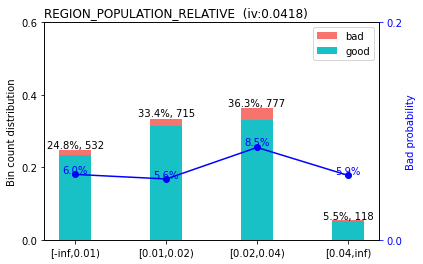

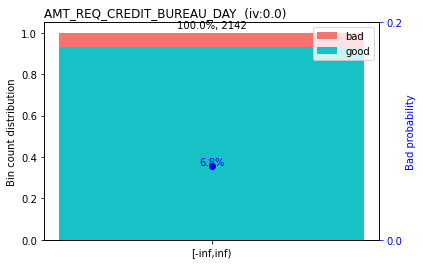

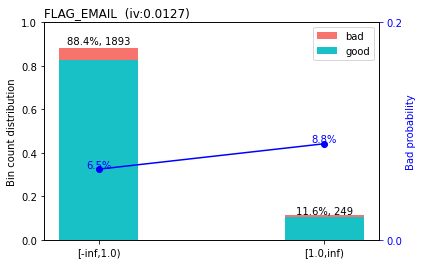

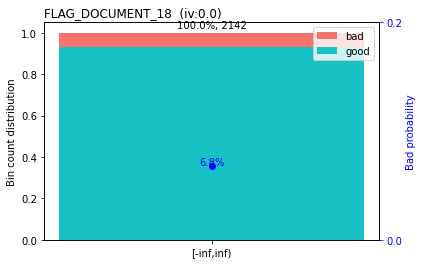

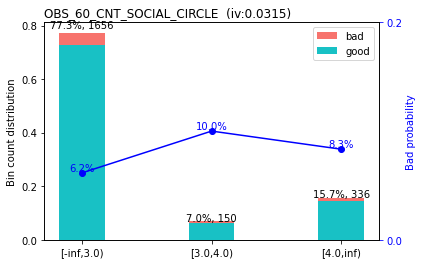

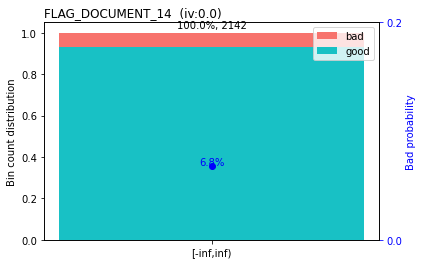

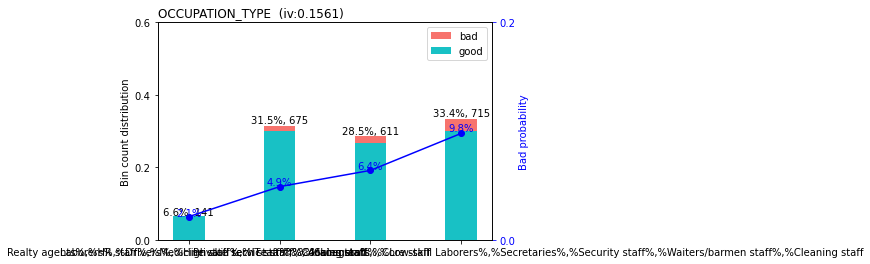

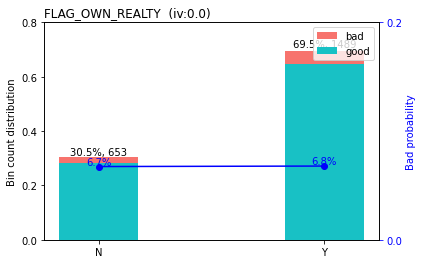

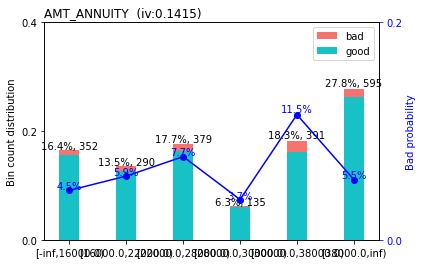

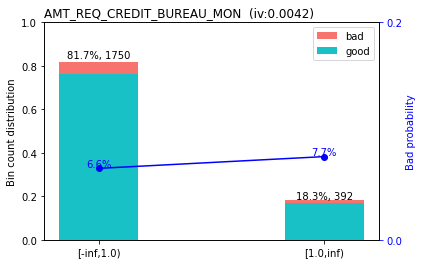

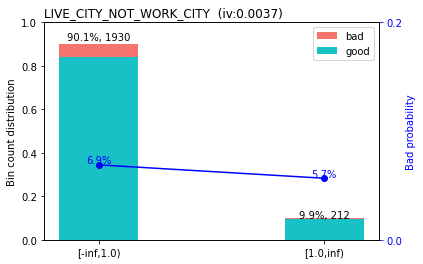

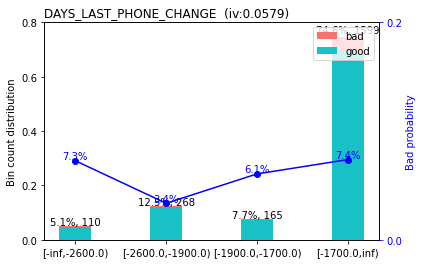

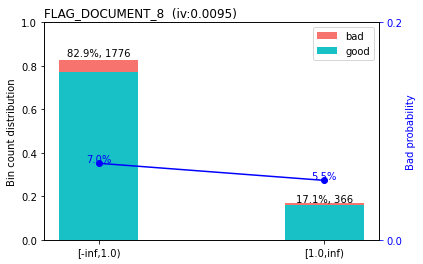

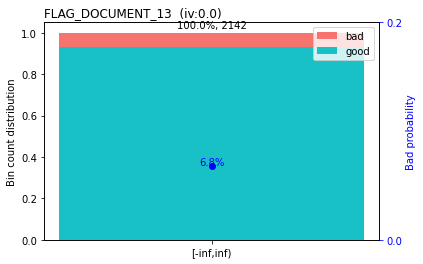

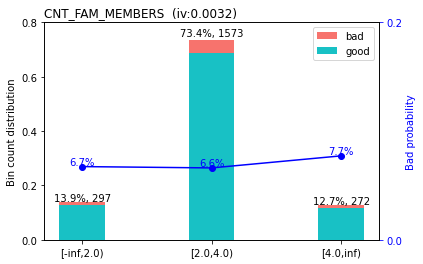

In [28]:
sc.woebin_plot(bins)

In [29]:
filtered = data_filter_self[['STATUS','EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','APARTMENTS_AVG','OCCUPATION_TYPE','DAYS_ID_PUBLISH','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_REGISTRATION']]

In [30]:
train, test = sc.split_df(filtered, 'STATUS', ratio=0.7).values()
print(train.shape)
print(test.shape)

(1500, 10)
(642, 10)


In [31]:
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


STATUS  DAYS_ID_PUBLISH_woe  EXT_SOURCE_3_woe  EXT_SOURCE_2_woe  \
124          0            -0.097217         -0.482479         -0.302190   
236          0            -0.272981         -0.482479         -0.302190   
492          1             0.589270          0.990538          0.344375   
701          0            -0.272981         -1.040894          1.410727   
775          0             0.224772         -0.482479         -0.302190   
...        ...                  ...               ...               ...   
306301       0            -0.272981         -0.482479         -0.302190   
306759       0            -0.024295         -0.482479          0.344375   
306819       0            -0.024295         -1.040894         -0.302190   
306855       0            -0.024295         -1.040894          0.033717   
306967       0             0.589270          0.990538          0.344375   

        EXT_SOURCE_1_woe  DAYS_EMPLOYED_woe  OCCUPATION_TYPE_woe  \
124            -0.245692          -1.255454             0.401913   
236            -0.245692          -0.092500             0.401913   
492             0.778627           0.101951            -0.345413   
701            -0.245692          -0.092500            -0.062910   
775            -0.663867          -0.440723            -1.205974   
...                  ...                ...                  ...   
306301         -0.663867           0.534927            -0.345413   
306759         -0.663867          -0.191718            -0.345413   
306819          0.778627          -0.191718            -0.345413   
306855         -0.245692          -0.092500             0.401913   
306967         -0.245692          -0.440723            -0.345413   

        DAYS_REGISTRATION_woe  AMT_ANNUITY_woe  APARTMENTS_AVG_woe  
124                  0.474862        -0.153591            0.165116  
236                 -0.713497        -0.212327           -0.044140  
492                  0.474862        -0.421855            0.165116  
701                  0.474862        -0.212327           -1.121782  
775                 -0.083120        -0.212327           -0.044140  
...                       ...              ...                 ...  
306301              -0.083120        -0.635429           -0.044140  
306759              -0.713497         0.132030            0.165116  
306819               0.474862        -0.153591            0.165116  
306855               0.474862        -0.212327           -0.044140  
306967               0.474862        -0.212327            0.165116  

[1500 rows x 10 columns]

In [32]:
y_train = train_woe.loc[:,'STATUS']
X_train = train_woe.loc[:,train_woe.columns != 'STATUS']
y_test = test_woe.loc[:,'STATUS']
X_test = test_woe.loc[:,train_woe.columns != 'STATUS']

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 124 to 306967
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DAYS_ID_PUBLISH_woe    1500 non-null   float64
 1   EXT_SOURCE_3_woe       1500 non-null   float64
 2   EXT_SOURCE_2_woe       1500 non-null   float64
 3   EXT_SOURCE_1_woe       1500 non-null   float64
 4   DAYS_EMPLOYED_woe      1500 non-null   float64
 5   OCCUPATION_TYPE_woe    1500 non-null   float64
 6   DAYS_REGISTRATION_woe  1500 non-null   float64
 7   AMT_ANNUITY_woe        1500 non-null   float64
 8   APARTMENTS_AVG_woe     1500 non-null   float64
dtypes: float64(9)
memory usage: 149.5 KB


In [33]:
y_train = train_woe.loc[:,'STATUS']
X_train = train_woe.loc[:,train_woe.columns != 'STATUS']
y_test = test_woe.loc[:,'STATUS']
X_test = test_woe.loc[:,train_woe.columns != 'STATUS']

#create a logistic regression model object
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[0.6374838  0.85118129 0.76131603 0.85649534 0.79728429 0.8665352
  0.7879122  0.90803807 0.63408748]]
[-2.60823745]


In [34]:
card = sc.scorecard(bins, lr, X_train.columns, points0 = 600, odds0 = 1/20, pdo = 20,
      basepoints_eq0 = True)

pprint.pprint(card)

{'AMT_ANNUITY':         variable                bin  points
143  AMT_ANNUITY     [-inf,16000.0)    76.0
144  AMT_ANNUITY  [16000.0,22000.0)    69.0
145  AMT_ANNUITY  [22000.0,28000.0)    62.0
146  AMT_ANNUITY  [28000.0,30000.0)    82.0
147  AMT_ANNUITY  [30000.0,38000.0)    50.0
148  AMT_ANNUITY      [38000.0,inf)    71.0,
 'APARTMENTS_AVG':           variable          bin  points
36  APARTMENTS_AVG  [-inf,0.11)    62.0
37  APARTMENTS_AVG   [0.11,0.2)    66.0
38  APARTMENTS_AVG    [0.2,inf)    86.0,
 'DAYS_EMPLOYED':          variable                bin  points
92  DAYS_EMPLOYED     [-inf,-5000.0)    76.0
93  DAYS_EMPLOYED  [-5000.0,-3800.0)    94.0
94  DAYS_EMPLOYED  [-3800.0,-3000.0)    56.0
95  DAYS_EMPLOYED  [-3000.0,-1400.0)    70.0
96  DAYS_EMPLOYED  [-1400.0,-1200.0)    52.0
97  DAYS_EMPLOYED   [-1200.0,-600.0)    68.0
98  DAYS_EMPLOYED    [-600.0,-400.0)    53.0
99  DAYS_EMPLOYED       [-400.0,inf)    63.0,
 'DAYS_ID_PUBLISH':            variable                bin  points
8   

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

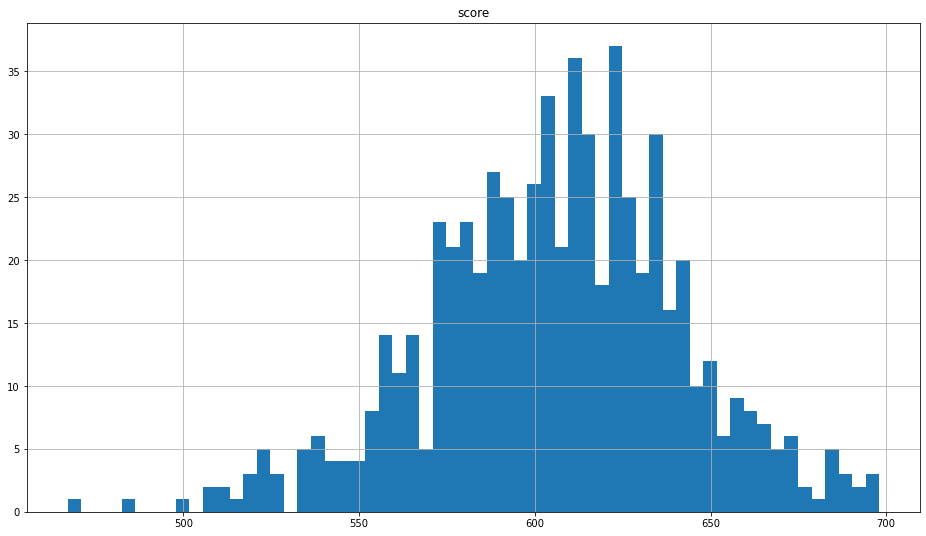

In [35]:
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

#distrubution of scores on test data
test_score.hist(figsize=(16,9),bins=60)

Text(0.5, 1.0, 'test data scores')

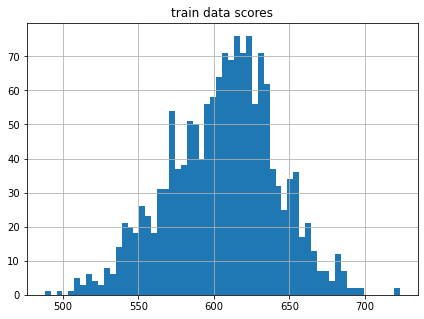

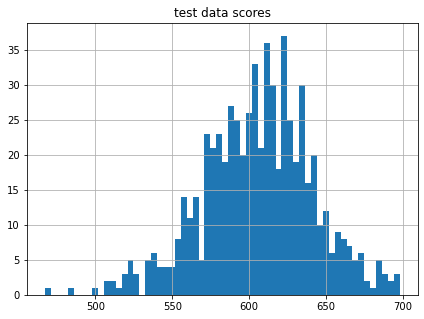

In [36]:
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

#distrubution of scores on test data
train_score.hist(figsize=(7,5),bins=60)
plt.title('train data scores')
test_score.hist(figsize=(7,5),bins=60)
plt.title('test data scores')

In [37]:
# sample code
# print evaluation metrics of the model
y_pred = lr.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_pred, y_test))
print("\nPCC measures:")
print(classification_report(y_pred, y_test))

Confusion matrix:
[[597  38]
 [  2   5]]

PCC measures:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       635
           1       0.12      0.71      0.20         7

    accuracy                           0.94       642
   macro avg       0.56      0.83      0.58       642
weighted avg       0.99      0.94      0.96       642



-------------------------------------------------------------------------------------------------------------------------------